<h1>Data Visualization with Python</h1>

__Goal of the project:__

Recreate the figure, which displays the results of the study, using the dataset and the seaborn library.

__Dataset description:__

The dataset contains the results of a mock study where 100 red squirrels were given one of three different diets after weaning, and their full grown adult weights were recorded.

<h2>Exploring the dataset</h2>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [5]:
try:
    data=pd.read_csv('squirrel_diet.csv')
except:
    data=pd.read_csv('/datasets/squirrel_diet.csv')

In [6]:
warnings.filterwarnings('ignore')

In [7]:
df=data.copy()

In [8]:
df.head()

,sex,diet,weight
0,0,3,1.042
1,1,3,1.196
2,1,2,1.401
3,1,1,1.015
4,0,2,1.141


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     100 non-null    int64  
 1   diet    100 non-null    int64  
 2   weight  100 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [10]:
df.describe()

,sex,diet,weight
count,100.000000,100.0000,100.000000
mean,0.480000,1.9600,1.126600
std,0.502117,0.8278,0.188248
min,0.000000,1.0000,0.681000
25%,0.000000,1.0000,1.000500
50%,0.000000,2.0000,1.077500
75%,1.000000,3.0000,1.213500
max,1.000000,3.0000,1.979000


In [11]:
df.isna().sum()

sex       0
diet      0
weight    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['sex'].unique()

array([0, 1])

In [14]:
df['sex'].value_counts()

sex
0    52
1    48
Name: count, dtype: int64

In [15]:
df['diet'].unique()

array([3, 2, 1])

In [16]:
df['diet'].value_counts()

diet
1    36
3    32
2    32
Name: count, dtype: int64

In [17]:
df['weight'].unique()

array([1.042, 1.196, 1.401, 1.015, 1.141, 1.113, 1.213, 1.132, 1.034,
       1.045, 1.168, 1.413, 1.248, 0.971, 1.093, 1.171, 1.21 , 1.032,
       1.158, 1.262, 1.009, 1.275, 0.992, 1.03 , 1.479, 0.967, 1.152,
       0.985, 1.083, 0.912, 1.178, 0.959, 1.039, 1.257, 1.001, 1.604,
       1.043, 0.681, 1.041, 1.103, 1.127, 1.274, 0.943, 0.984, 1.18 ,
       1.165, 1.59 , 0.983, 1.261, 0.961, 0.946, 1.339, 1.292, 1.32 ,
       1.005, 0.926, 1.489, 1.077, 0.906, 1.353, 1.091, 1.541, 1.287,
       0.963, 1.01 , 1.094, 0.953, 0.965, 0.974, 1.315, 1.363, 0.977,
       1.522, 1.078, 1.066, 1.059, 1.136, 1.272, 1.011, 0.916, 1.081,
       1.014, 1.215, 1.024, 0.999, 1.049, 0.995, 1.979, 1.099, 1.327,
       0.99 ])

<h3>Conclusions:</h3>

* The column names are formatted properly.
* There are no missing values in the dataset.
* There are no duplicate values in the dataset.
* There are no strange values in the columns.
* The dataset is ready for creating a plot.

<h2>Building a plot</h2>

1. First visualization of the dataset - overview:

<Axes: xlabel='diet', ylabel='weight'>

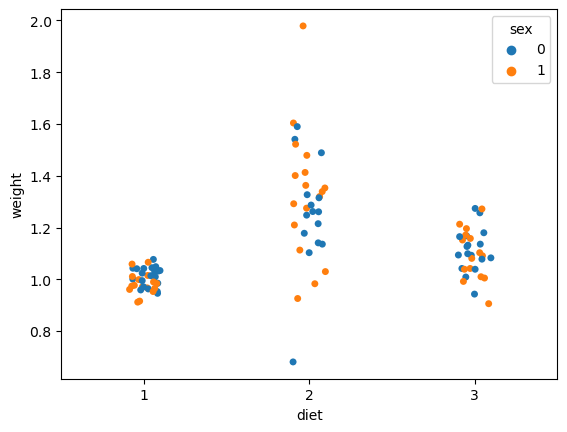

In [21]:
sns.stripplot(x="diet", y="weight", hue="sex", data=df)

Converting the legend labels of sex from 0/1 to Female/Male:

In [23]:
df['sex'] = df['sex'].replace({0: 'Female', 1: 'Male'})

Converting the x-axis labels of diet from 1/2/3 to A/B/C:

In [25]:
df['diet'] = df['diet'].replace({1: 'A', 2: 'B', 3: 'C'})

Setting the x-axis data order:

In [27]:
diet_order = ['A', 'B', 'C']

2. Second visualization of the dataset - checking the applied changes:

<Axes: xlabel='diet', ylabel='weight'>

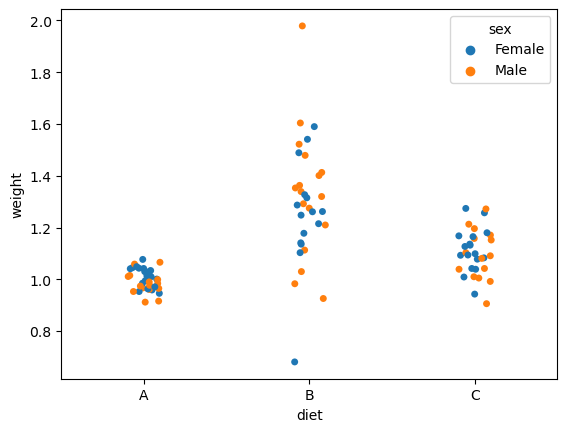

In [29]:
sns.stripplot(x="diet", y="weight", hue="sex", order = diet_order, data=df)

3. Final visualization of the dataset - formatting the figure:

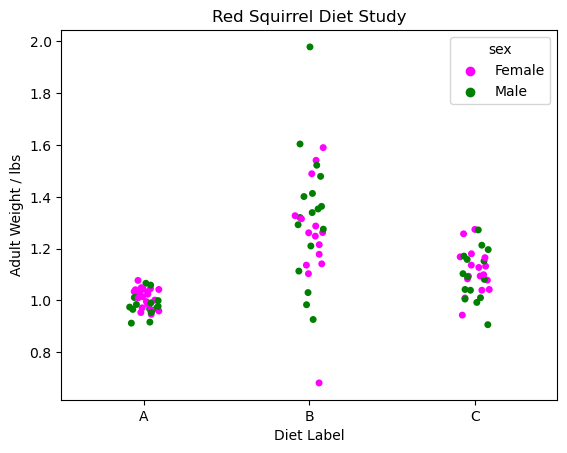

<Figure size 640x480 with 0 Axes>

In [31]:
sns.stripplot(x="diet", y="weight", hue="sex", order = diet_order, data=df, palette={"Male": "green", "Female": "magenta"},  jitter=0.09)
plt.xticks(range(len(diet_order)), diet_order)
plt.xlabel("Diet Label")
plt.ylabel("Adult Weight / lbs")
plt.title("Red Squirrel Diet Study")
plt.show()
plt.clf()

<h2>Conclusion</h2>

- The figure is recreated using the seaborn library.
- It presents the data in the same way as in the project description, including the title and axis labels, axis ticks and ranges, legend with magenta and green data points.
- Diet A had the least impact on the weight growth in comparison with diets B and C.
- Diet B has the biggest dispersion in weight, with outliers from both ends.
- Diet C shows small dispersion in weight, but it is more than for the diet A.
- The diets A and C have the same effect on the weight of both male and female squirrels.
- The weight of male squirrels varies a lot for the diet B, from 0.9 to 1.6 lbs, while the weight of female squirrels with the diet B is more compact and varies within 1.1 and 1.3 lbs, with some outliers from both sides.